Experiment 3 is very similar to experiment 1 except that the data is preprocess before being passed into the the model for training.

1. Importing helping functions and the data

In [1]:
from help_functions import download_and_unzip, dir_explore, create_callbacks, plot_loss_curves, view_random_image

In [2]:
url =  'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip'
zip_file_name = '10_food_classes_10_percent.zip'
data_folder_path = zip_file_name[:-4]

download_and_unzip(url, zip_file_name)

Beginning file download...


In [3]:
dir_explore(zip_file_name[:-4])

There are 2 directories and 0 files in 10_food_classes_10_percent folder.
There are 10 directories and 0 files in 10_food_classes_10_percent\test folder.
There are 0 directories and 250 files in 10_food_classes_10_percent\test\chicken_curry folder.
There are 0 directories and 250 files in 10_food_classes_10_percent\test\chicken_wings folder.
There are 0 directories and 250 files in 10_food_classes_10_percent\test\fried_rice folder.
There are 0 directories and 250 files in 10_food_classes_10_percent\test\grilled_salmon folder.
There are 0 directories and 250 files in 10_food_classes_10_percent\test\hamburger folder.
There are 0 directories and 250 files in 10_food_classes_10_percent\test\ice_cream folder.
There are 0 directories and 250 files in 10_food_classes_10_percent\test\pizza folder.
There are 0 directories and 250 files in 10_food_classes_10_percent\test\ramen folder.
There are 0 directories and 250 files in 10_food_classes_10_percent\test\steak folder.
There are 0 directories a

2. Defining the training and testing data flow process.

In [4]:
import tensorflow as tf

batch_size=32
image_size=(222,222)

train_data_dir = data_folder_path + '/train'
test_data_dir = data_folder_path + '/test'

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_data_dir, 
                                                                batch_size=batch_size, 
                                                                image_size=image_size,
                                                                label_mode='categorical')
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_data_dir, 
                                                                batch_size=batch_size, 
                                                                image_size=image_size,
                                                                 label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


3. Defining data augmentation layers

In [5]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
], name = 'data_augmentation')

4. Viewing a random image with/without data augmentation.

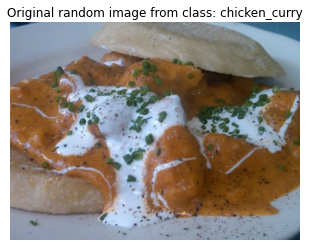

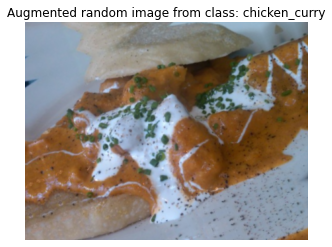

In [6]:
import matplotlib.pyplot as plt

img, target_class = view_random_image(train_data_dir)

augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

5. Defining the model sequence.

In [7]:
from tensorflow import keras

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

input = tf.keras.layers.Input(shape = image_size + (3,) , name="input_layer")

x = data_augmentation(input)

x = base_model(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

output = tf.keras.layers.Dense(10, activation='softmax', name = 'output_layer')(x)

model_2 = keras.Model(input, output)

6. Compiling and fitting the model

In [8]:
from tensorflow.keras.optimizers import Adam
model_2.compile(loss = 'categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_2_history = model_2.fit(train_data, 
            steps_per_epoch=len(train_data), 
            epochs=5,   
            validation_data=test_data, 
            validation_steps=int(0.25*len(test_data)),
            callbacks = create_callbacks(tensorboard_dir_name='TensorBoard',
                                            experiment_name= 'EfficientNet_FineTuning_Exp_03',
                                            checkpoint_path = 'Models/Exp_03_Models/model_2_ep_{epoch:02d}_val_accuracy_{val_accuracy:.04f}.ckpt',
                                            save_weights_only = True)
                                            )

Saving TensorBoard log files to: TensorBoard/EfficientNet_FineTuning_Exp_03/20211125-112650
Epoch 1/5


C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 39s 1s/step - loss: 2.0219 - accuracy: 0.3333 - val_loss: 1.5268 - val_accuracy: 0.6316
Epoch 2/5
24/24 [==============================] - 31s 1s/step - loss: 1.3714 - accuracy: 0.6707 - val_loss: 1.0678 - val_accuracy: 0.7533
Epoch 3/5
24/24 [==============================] - 32s 1s/step - loss: 1.0699 - accuracy: 0.7293 - val_loss: 0.8977 - val_accuracy: 0.7796
Epoch 4/5
24/24 [==============================] - 33s 1s/step - loss: 0.8938 - accuracy: 0.7720 - val_loss: 0.7662 - val_accuracy: 0.8092
Epoch 5/5
24/24 [==============================] - 30s 1s/step - loss: 0.8151 - accuracy: 0.7800 - val_loss: 0.7283 - val_accuracy: 0.7993


7. Model evaluation and plotting the loss curves

In [9]:
model_2_evaluate_results = model_2.evaluate(test_data)

79/79 [==============================] - 56s 709ms/step - loss: 0.7033 - accuracy: 0.8068


In [13]:
model_2_evaluate_results

[0.7032669186592102, 0.8068000078201294]

81 % is a good accuracy.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


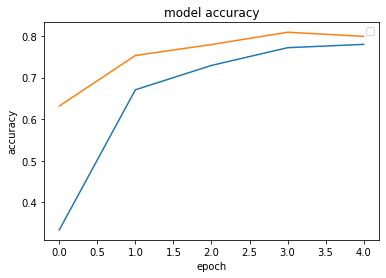

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


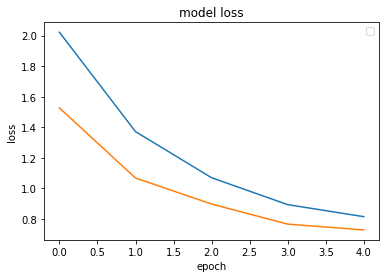

In [14]:
plot_loss_curves(model_2_history)

In [15]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 222, 222, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainabl

In experiment 4 we will be unfreezing top layers of EfficientNEtB0 and start training from where the experiment 3 was finished i.e. from epoch 5.

In [21]:
model_2.load_weights('Models/Exp_03_Models/model_2_ep_05_val_accuracy_0.7993.ckpt')

In [22]:
model_2_evaluate_results_loaded = model_2.evaluate(test_data)

79/79 [==============================] - 54s 681ms/step - loss: 0.7033 - accuracy: 0.8068


In [23]:
model_2_evaluate_results_loaded

[0.7032670974731445, 0.8068000078201294]

In [24]:
model_2.layers

In [25]:
for layer in model_2.layers:
  print(layer.trainable)

True
True
False
True
True


In [26]:
print(len(model_2.layers[2].trainable_variables))

0


In [27]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [28]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss="categorical_crossentropy",
              optimizer=Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
model_2.layers

In [35]:
print(len(model_2.trainable_variables))

12


In [31]:
model_2_history_exp04 = model_2.fit(train_data, 
            steps_per_epoch=len(train_data), 
            initial_epoch = model_2_history.epoch[-1],
            epochs=10,   
            validation_data=test_data, 
            validation_steps=int(0.25*len(test_data)),
            callbacks = create_callbacks(tensorboard_dir_name='TensorBoard',
                                            experiment_name= 'EfficientNet_FineTuning_Exp_04',
                                            checkpoint_path = 'Models/Exp_04_Models/model_2_exp_04_ep_{epoch:02d}_val_accuracy_{val_accuracy:.04f}.ckpt', 
                                            save_weights_only=True)
                                            )

Saving TensorBoard log files to: TensorBoard/EfficientNet_FineTuning_Exp_04/20211125-114001
Epoch 5/10


C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 39s 1s/step - loss: 0.6843 - accuracy: 0.7880 - val_loss: 0.5743 - val_accuracy: 0.8289
Epoch 6/10
24/24 [==============================] - 34s 1s/step - loss: 0.5710 - accuracy: 0.8187 - val_loss: 0.5391 - val_accuracy: 0.8306
Epoch 7/10
24/24 [==============================] - 33s 1s/step - loss: 0.5097 - accuracy: 0.8333 - val_loss: 0.5439 - val_accuracy: 0.8207
Epoch 8/10
24/24 [==============================] - 32s 1s/step - loss: 0.4524 - accuracy: 0.8587 - val_loss: 0.5300 - val_accuracy: 0.8240
Epoch 9/10
24/24 [==============================] - 32s 1s/step - loss: 0.4187 - accuracy: 0.8720 - val_loss: 0.4908 - val_accuracy: 0.8322
Epoch 10/10
24/24 [==============================] - 32s 1s/step - loss: 0.3702 - accuracy: 0.8693 - val_loss: 0.5490 - val_accuracy: 0.8273
